In [39]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [40]:
df = pd.read_csv("data/1.32.csv")

## checks

In [41]:
pd.__version__

u'0.17.0'

In [42]:
np.__version__

'1.10.1'

## normalization

In [43]:
#df["id"] = df["id"].astype(str)
df["userTime"] = df["userTime"].astype(pd.Timestamp)
df["serverTime"] = df["serverTime"].astype(np.datetime64)
#df["gameVersion"] = df["gameVersion"].astype(str)
#df["gameVersion"] = df["gameVersion"].astype(str)
#df["gameVersion"] = df["gameVersion"].astype(str)
df["gameVersion"] = df["gameVersion"].astype(str)


In [44]:
df.head()

,id,serverTime,userTime,gameVersion,playerId,playerBirthdate,playerRegion,playerCountry,playerGender,playerExternalId,...,type,coordinates,section,customData.language,customData.controls,customData.device,customData.sound,customData.gamelevel,customData,customData.dnabit
0,13815a6e-da1d-4b1d-862f-6e394a4cec98,2015-09-10 12:32:45.204,2015-09-10T12:32:48.469Z,be209fe8-0ef3-4291-a5f4-c2b389f5d77d,2bb4a2ab-eaf1-4e0e-b2fe-5f5e88248733,NaN,NaN,NaN,NaN,NaN,...,start,"[-6, 143]",NaN,NaN,NaN,NaN,NaN,NaN,null,NaN
1,36963346-0445-45ce-bad0-b767325becb2,2015-09-10 12:32:45.212,2015-09-10T12:32:48.481Z,be209fe8-0ef3-4291-a5f4-c2b389f5d77d,8565a7b9-811b-4b56-9cae-c7eeb28314d7,NaN,NaN,NaN,NaN,NaN,...,start,"[-6, 143]",NaN,NaN,NaN,NaN,NaN,NaN,null,NaN
2,7705c2aa-1de0-40c2-8cea-71e60b326f54,2015-09-10 12:33:35.665,2015-09-10T12:33:38.935Z,be209fe8-0ef3-4291-a5f4-c2b389f5d77d,8565a7b9-811b-4b56-9cae-c7eeb28314d7,NaN,NaN,NaN,NaN,NaN,...,reach,"[-6, 134]",Checkpoint01,NaN,NaN,NaN,NaN,NaN,null,NaN
3,b327e325-bf7d-4ecc-9c7c-ab9b3894eedd,2015-09-10 13:41:43.245,2015-09-10T13:41:46.501Z,be209fe8-0ef3-4291-a5f4-c2b389f5d77d,4d9c1137-d582-4333-b264-e59eebd2b6d8,NaN,NaN,NaN,NaN,NaN,...,start,"[-6, 143]",NaN,NaN,NaN,NaN,NaN,NaN,null,NaN
4,d00eb541-9be1-4483-b622-f72b30507adb,2015-09-10 13:41:53.529,2015-09-10T13:41:56.785Z,be209fe8-0ef3-4291-a5f4-c2b389f5d77d,4d9c1137-d582-4333-b264-e59eebd2b6d8,NaN,NaN,NaN,NaN,NaN,...,reach,"[-4, 134]",Checkpoint01,NaN,NaN,NaN,NaN,NaN,null,NaN


## Game versions

In [45]:
#df.groupby("gameVersion").size().plot(kind="bar")
# plt.figure();
# df["gameVersion"].astype(str).plot(kind="hist")

df["gameVersion"].value_counts()

be209fe8-0ef3-4291-a5f4-c2b389f5d77d    1774
Name: gameVersion, dtype: int64

## Unique Game Sessions

Number of unique game sessions

In [46]:
playerscount = df["playerId"].nunique()
playerscount

184

## Events per Player

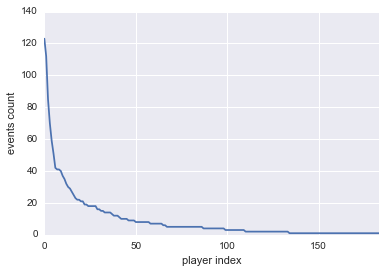

In [47]:
eventstable = pd.DataFrame({"events" : df["playerId"].value_counts().values})
eventstable.plot()
plt.ylabel("events count")
plt.xlabel("player index")
plt.legend('')

## Deaths

In [48]:
deathscount = df[df["type"]=="death"]["id"].count()
deathscount

229

In [49]:
deathscount / float(playerscount)

1.2445652173913044

In [50]:
deadplayers = df[df["type"]=="death"]["playerId"].value_counts()
deadplayerscount = deadplayers.count()
deadplayerscount

50

,deaths
count,50.000000
mean,4.580000
std,5.620988
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,24.000000


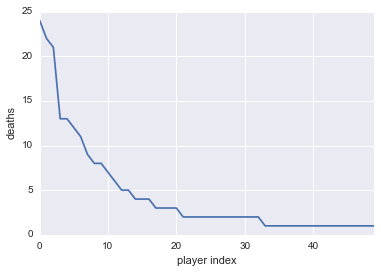

In [51]:
deathtable = pd.DataFrame({"deaths" : deadplayers.values})
deathtable.plot()
plt.xlabel("player index")
plt.ylabel("deaths")
plt.legend('')
deathtable.describe()

0      0.0
1     18.4
2     36.8
3     55.2
4     73.6
5     92.0
6    110.4
7    128.8
8    147.2
9    165.6
dtype: float64


,deaths
count,183.000000
mean,1.251366
std,3.562964
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,24.000000


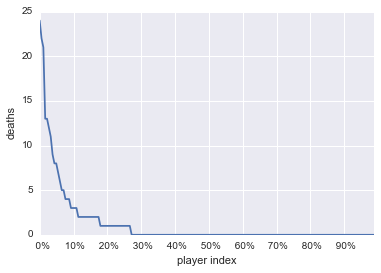

In [88]:
neverdeadseries = pd.Series(0, index=(list(range(deadplayerscount,playerscount-1))))
neverdead = pd.DataFrame({"deaths":neverdeadseries})
alldeathtable = pd.concat([deathtable, neverdead]) 
ax = alldeathtable.plot()
plt.xlabel("player index")
plt.ylabel("deaths")
plt.legend('')

alldeathtable.describe()

## Equipped Devices

Number of devices equipped by players

In [53]:
equipscount = df[df["type"]=="equip"]["id"].count()
equipscount

241

Mean number of devices equipped by players

In [54]:
mean = equipscount / float(playerscount)
mean

1.3097826086956521

Number of players who equipped devices

In [55]:
equipedplayers = df[df["type"]=="equip"]["playerId"].value_counts()
equipedplayerscount = equipedplayers.count()
equipedplayerscount

59

,equips
count,183.000000
mean,1.316940
std,3.700028
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,31.000000


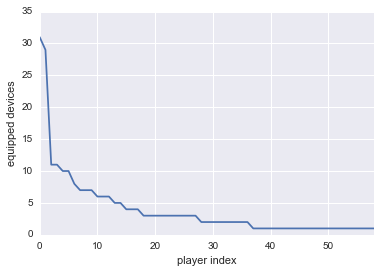

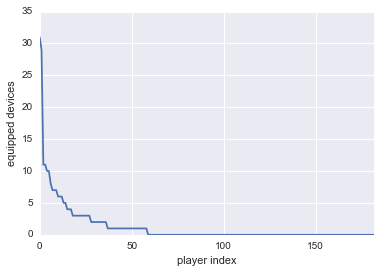

In [56]:
equiptable = pd.DataFrame({"equips" : equipedplayers.values})
equiptable.plot()
plt.xlabel("player index")
plt.ylabel("equipped devices")
plt.legend('')
equiptable.describe()
neverequipedseries = pd.Series(0, index=(list(range(equipedplayerscount,playerscount-1))))
neverequiped = pd.DataFrame({"equips":neverequipedseries})
allequiptable = pd.concat([equiptable, neverequiped]) 
allequiptable.plot()
plt.xlabel("player index")
plt.ylabel("equipped devices")
plt.legend('')
allequiptable.describe()


## Crafted Devices

In [57]:
craftscount = df[df["type"]=="craft"]["id"].count()
craftscount

70

In [58]:
mean = craftscount / float(playerscount)
mean

0.38043478260869568

In [59]:
craftedplayers = df[df["type"]=="craft"]["playerId"].value_counts()

craftedplayerscount = craftedplayers.count()
craftedplayerscount

21

,crafts
count,183.000000
mean,0.382514
std,1.987909
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,18.000000


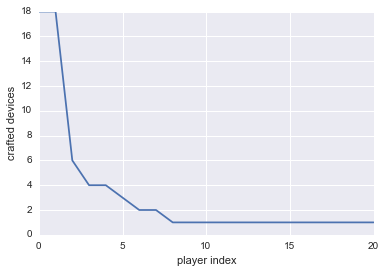

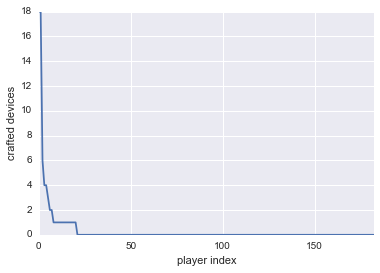

In [60]:
crafttable = pd.DataFrame({"crafts" : craftedplayers.values})
crafttable.plot()

plt.xlabel("player index")
plt.ylabel("crafted devices")

plt.legend('')
crafttable.describe()

nevercraftedseries = pd.Series(0, index=(list(range(craftedplayerscount,playerscount-1))))
nevercrafted = pd.DataFrame({"crafts":nevercraftedseries})

allcrafttable = pd.concat([crafttable, nevercrafted]) 
allcrafttable.plot()

plt.xlabel("player index")
plt.ylabel("crafted devices")

plt.legend('')
allcrafttable.describe()

## Completion

Number of finished games

In [61]:
completescount = df[df["type"]=="complete"]["id"].count()
completescount

11

Mean number of games finished by players

In [62]:
mean = completescount / float(playerscount)
mean

0.059782608695652176

Number of players who finished a game

In [63]:
completedplayers = df[df["type"]=="complete"]["playerId"].value_counts()

completedplayerscount = completedplayers.count()
completedplayerscount

9

,completes
count,183.000000
mean,0.060109
std,0.280686
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


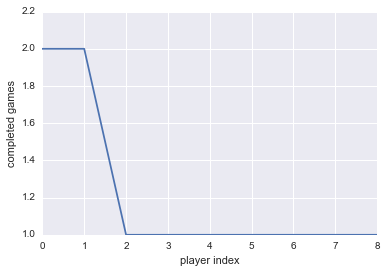

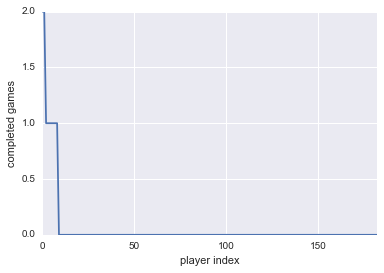

In [64]:
completetable = pd.DataFrame({"completes" : completedplayers.values})
completetable.plot()

plt.xlabel("player index")
plt.ylabel("completed games")

plt.legend('')
completetable.describe()

nevercompletedseries = pd.Series(0, index=(list(range(completedplayerscount,playerscount-1))))
nevercompleted = pd.DataFrame({"completes":nevercompletedseries})

allcompletetable = pd.concat([completetable, nevercompleted]) 
allcompletetable.plot()

plt.xlabel("player index")
plt.ylabel("completed games")

plt.legend('')
allcompletetable.describe()

Checkpoint reached by players

In [65]:
checkpoints = df[df["type"]=="reach"]["section"].value_counts()
checkpoints = checkpoints.sort_index()
checkpoints

Checkpoint01    171
Checkpoint02     80
Checkpoint03     31
Checkpoint04     23
Checkpoint05     23
Checkpoint06     26
Checkpoint07     23
Checkpoint08     29
Name: section, dtype: int64

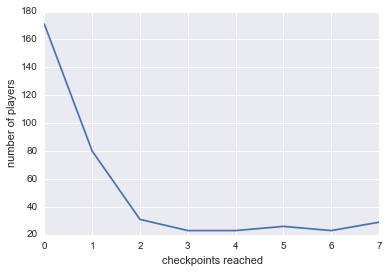

In [66]:
checkpointstable = pd.DataFrame({"checkpoints" : checkpoints.values})
checkpointstable.plot()
plt.ylabel("number of players")
plt.xlabel("checkpoints reached")
plt.legend('')

In [67]:
checkpointsbyplayer = df[df["type"]=="reach"].loc[:,['section','playerId']]
grouped = checkpointsbyplayer.groupby("playerId")
maxCheckpointWithIDs = grouped.max()
maxCheckpointWithIDs.head()

,section
playerId,
00bd9fde-4cae-4e3e-ab3f-6aabeab58f62,Checkpoint08
00c6213a-7a0e-4890-94b4-ac614e513668,Checkpoint02
02c50a87-0ef8-4b7b-ae6b-420bfe38676e,Checkpoint07
048c0015-22c3-42f2-a5e9-1d3251e39155,Checkpoint01
0653abe5-f04a-4015-a13a-877cd1076038,Checkpoint01


In [68]:
reachedplayers = df[df["type"]=="reach"]["playerId"].value_counts()
reachedplayerscount = reachedplayers.count()
reachedplayerscount

117

In [69]:
maxCheckpointTable = pd.DataFrame({"maxCheckpoint" : maxCheckpointWithIDs.values.flatten()})
maxCheckpointCounts = maxCheckpointTable["maxCheckpoint"].value_counts()
maxCheckpointCounts['Checkpoint00'] = 0
maxCheckpointCounts = maxCheckpointCounts.sort_index()
maxCheckpointCounts

Checkpoint00     0
Checkpoint01    47
Checkpoint02    29
Checkpoint03     4
Checkpoint04     5
Checkpoint05     2
Checkpoint06     3
Checkpoint07     7
Checkpoint08    20
Name: maxCheckpoint, dtype: int64

,maxCheckpoint
count,9.000000
mean,13.000000
std,15.937377
min,0.000000
25%,3.000000
50%,5.000000
75%,20.000000
max,47.000000


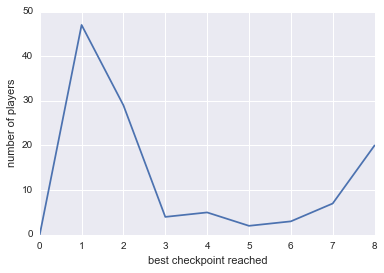

In [70]:
maxCheckpointCountsTable = pd.DataFrame({"maxCheckpoint" : maxCheckpointCounts.values})
maxCheckpointCountsTable.plot()
plt.legend('')
plt.ylabel("number of players")
plt.xlabel("best checkpoint reached")
maxCheckpointCountsTable.describe()

In [71]:
maxCheckpointCountsTable.head()

,maxCheckpoint
0,0
1,47
2,29
3,4
4,5


   maxCheckpoint
0             67
1             47
2             29
3              4
4              5


,maxCheckpoint
count,9.000000
mean,20.444444
std,23.130667
min,2.000000
25%,4.000000
50%,7.000000
75%,29.000000
max,67.000000


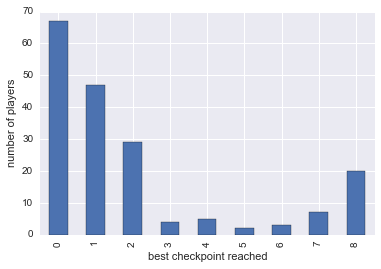

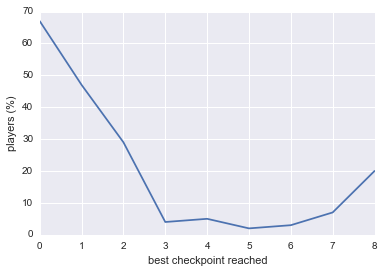

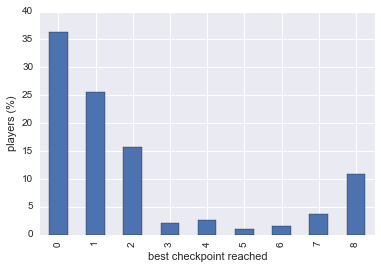

In [72]:
#allreachedtable = maxCheckpointCountsTable
#allreachedtable.at[0, 'maxCheckpoint'] = playerscount - reachedplayerscount
#allreachedtable.plot()

maxCheckpointCounts['Checkpoint00'] = playerscount - reachedplayerscount
maxCheckpointCountsTable = pd.DataFrame({"maxCheckpoint" : maxCheckpointCounts.values})

maxCheckpointCountsTable.plot(kind='bar')
plt.ylabel("number of players")
plt.xlabel("best checkpoint reached")
plt.legend('')

print maxCheckpointCountsTable.head()

maxCheckpointCountsTable.plot()
plt.ylabel("players (%)")
plt.xlabel("best checkpoint reached")
plt.legend('')

(maxCheckpointCountsTable*100/playerscount).plot(kind='bar')
plt.ylabel("players (%)")
plt.xlabel("best checkpoint reached")
plt.legend('')

maxCheckpointCountsTable.describe()

## Event types

In [73]:
df["type"].value_counts()

reach        406
configure    374
equip        241
death        229
start        180
pickup       102
unequip       96
craft         70
switch        49
restart       16
complete      11
Name: type, dtype: int64

## Misc

In [74]:
df.describe()

,playerBirthdate,playerRegion,playerCountry,playerGender,playerExternalId,playerCustomData
count,0,0,0,0,0,0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df.values[0]

array(['13815a6e-da1d-4b1d-862f-6e394a4cec98',
       Timestamp('2015-09-10 12:32:45.204000'), '2015-09-10T12:32:48.469Z',
       'be209fe8-0ef3-4291-a5f4-c2b389f5d77d',
       '2bb4a2ab-eaf1-4e0e-b2fe-5f5e88248733', nan, nan, nan, nan, nan,
       nan, 'start', '[-6, 143]', nan, nan, nan, nan, nan, nan, 'null', nan], dtype=object)